In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import joblib as joblib

In [2]:
df = pd.read_csv("zomato.csv")


In [3]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
#df['rate'] = df['rate'].astype(str)
#remove ("/5") from the rate column
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
#convert "rate" column to numeric
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
#errors='coerce' parameter means that any value which cannot be converted to a number will be set to NaN#

df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

In [6]:
#impute the missing data in rate using knn 
from sklearn.impute import KNNImputer
features_for_imputation = df[['rate']].copy()
imputer = KNNImputer(n_neighbors=5)   
imputed_data = imputer.fit_transform(features_for_imputation)
df['rate'] = imputed_data[:, 0]
print(df['rate'].isnull().sum())


0


In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df["approx_cost(for two people)"] = pd.to_numeric(df["approx_cost(for two people)"],errors="coerce")
df["approx_cost(for two people)"].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64

In [9]:
df['target'] = np.where(df['rate'] > 3.75, 1, 0)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1


In [10]:
data = df[["online_order","book_table","rest_type","location","approx_cost(for two people)","listed_in(type)","listed_in(city)","target"]]
data.head()
 

,online_order,book_table,rest_type,location,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,Casual Dining,Banashankari,800.0,Buffet,Banashankari,1
1,Yes,No,Casual Dining,Banashankari,800.0,Buffet,Banashankari,1
2,Yes,No,"Cafe, Casual Dining",Banashankari,800.0,Buffet,Banashankari,1
3,No,No,Quick Bites,Banashankari,300.0,Buffet,Banashankari,0
4,No,No,Casual Dining,Basavanagudi,600.0,Buffet,Banashankari,1


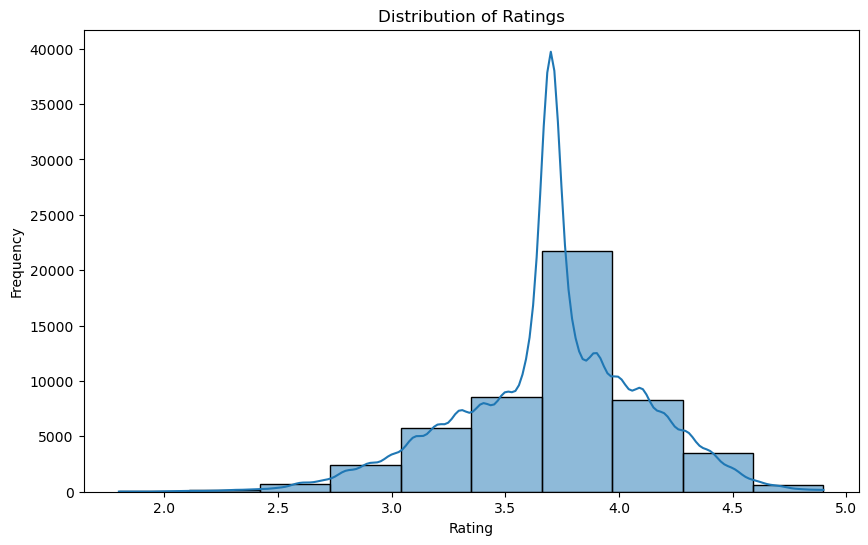

In [11]:
#visualiztion 
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

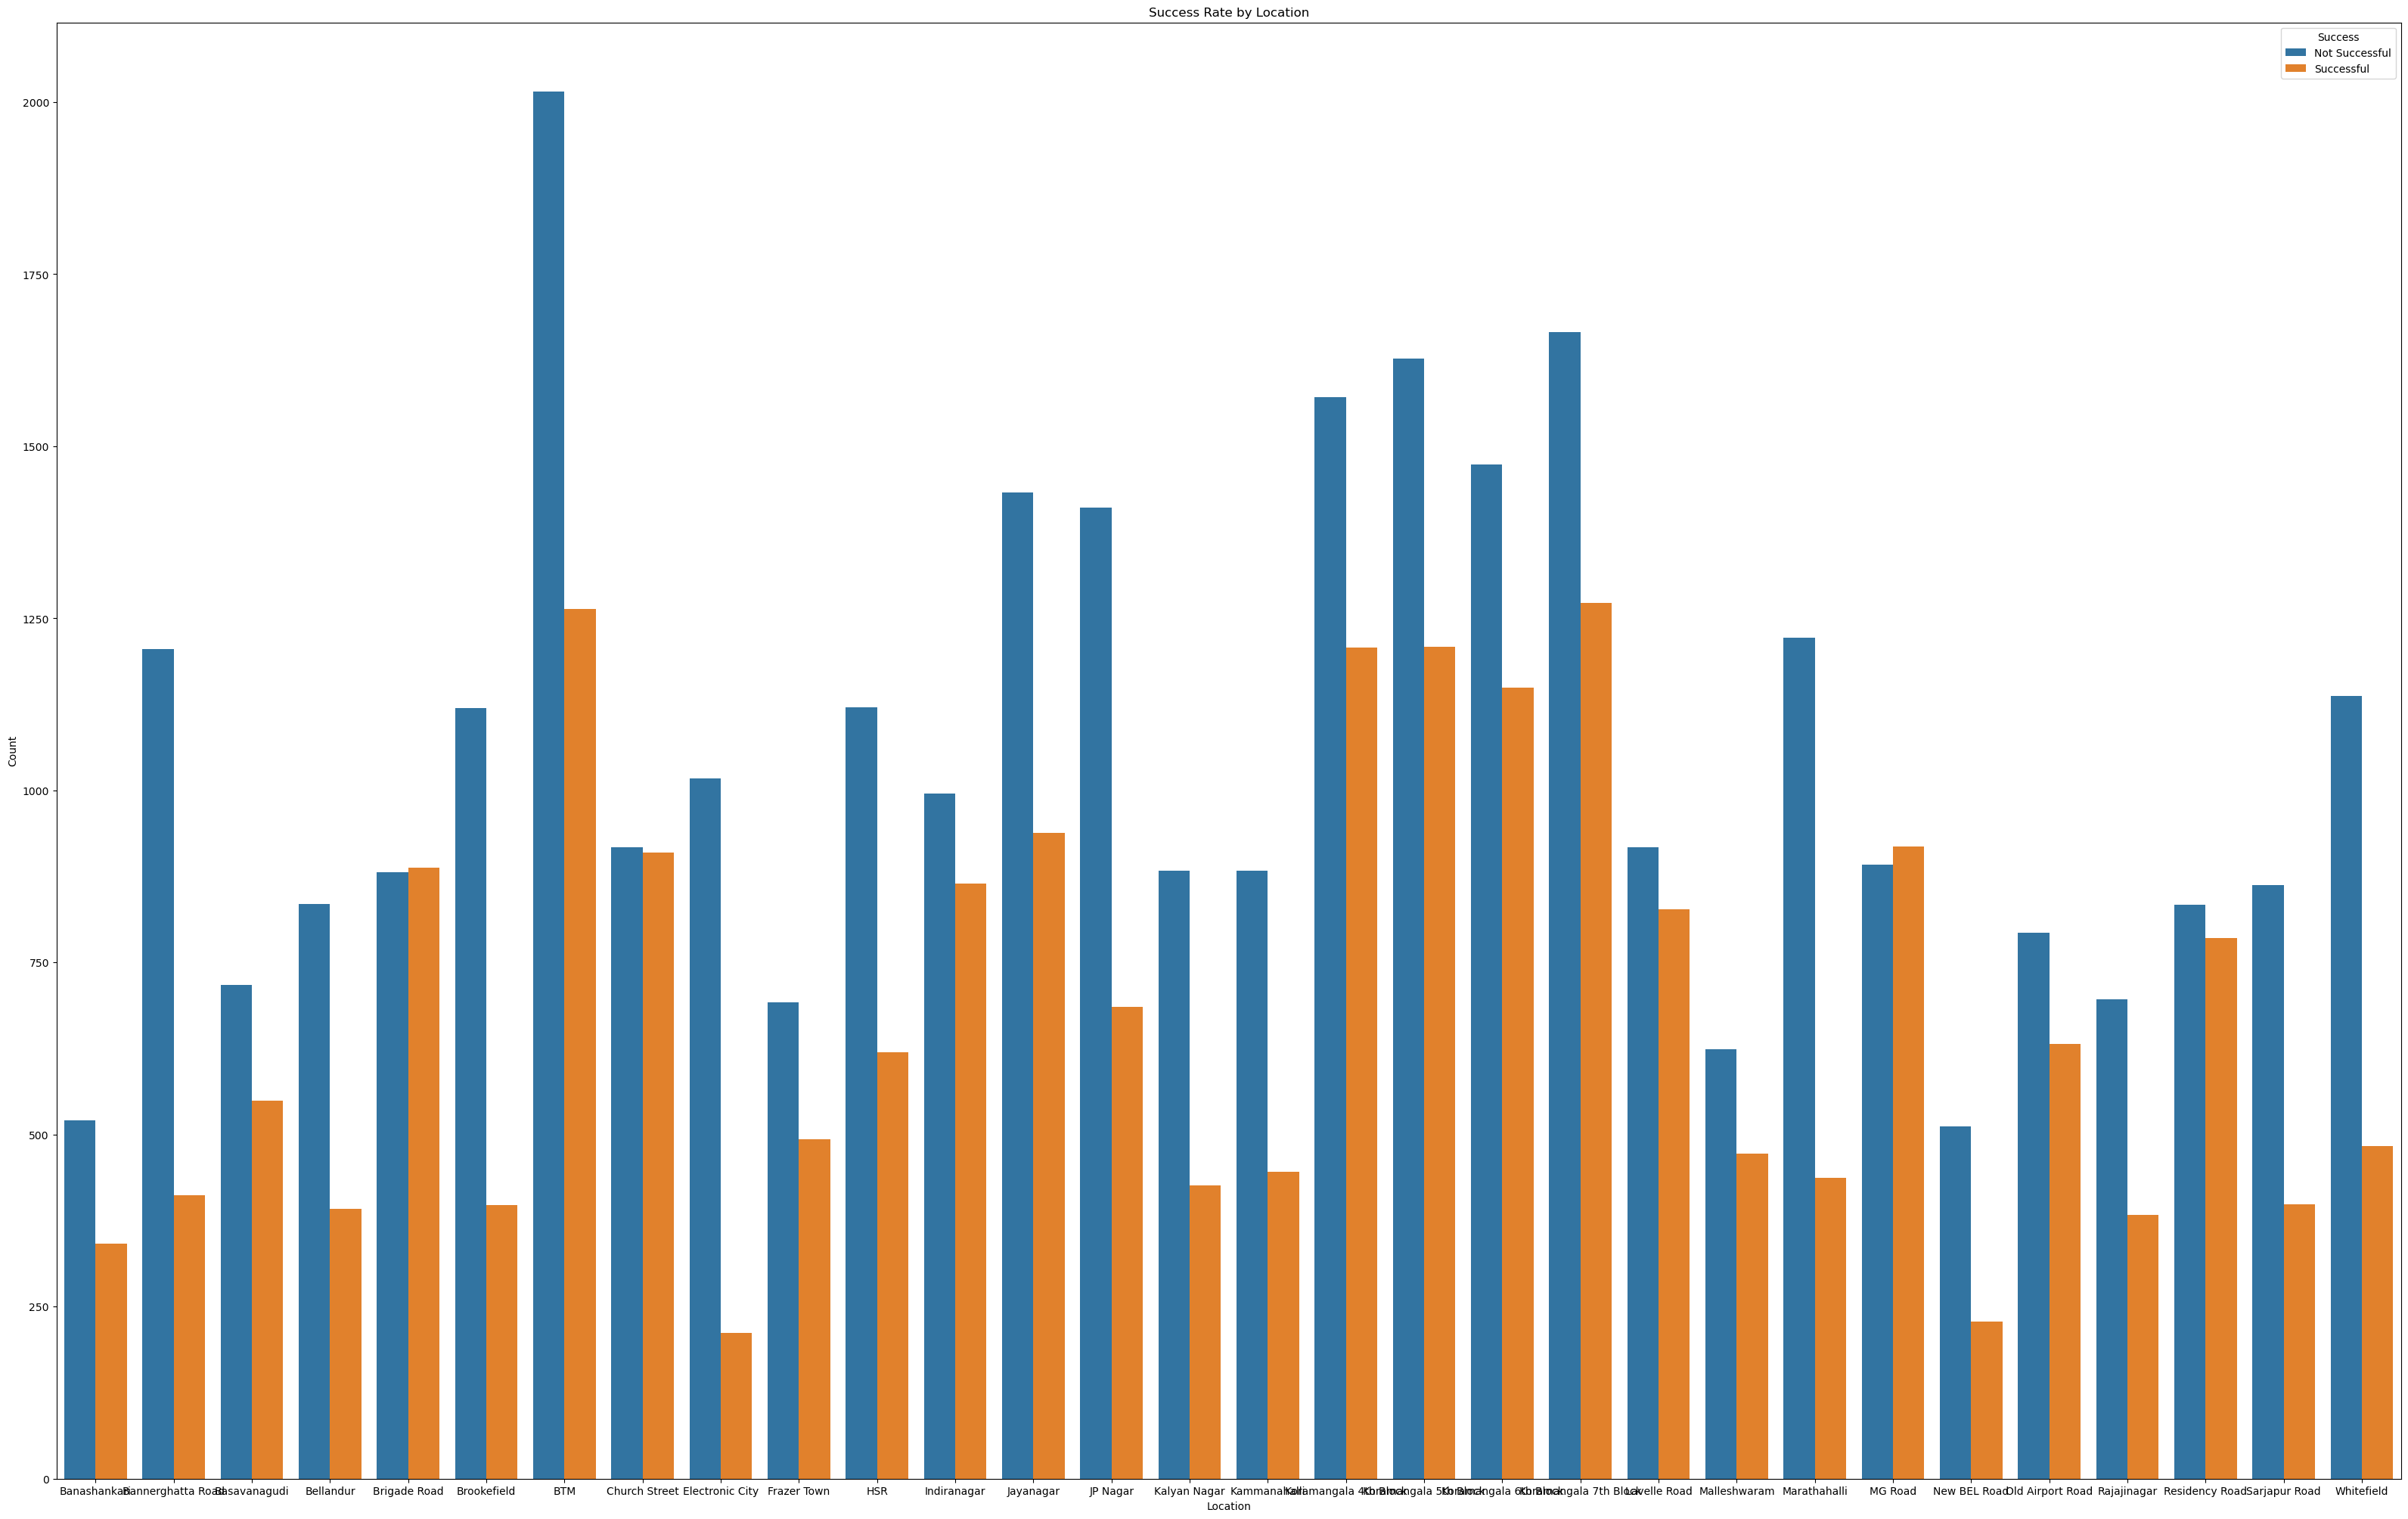

In [12]:
plt.figure(figsize=(40, 25))
sns.countplot(data=df, x='listed_in(city)', hue='target')
plt.title('Success Rate by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Success', loc='upper right', labels=['Not Successful', 'Successful'])
plt.show()

C:\Users\PICK TECH\AppData\Local\Temp\ipykernel_21960\3921171626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


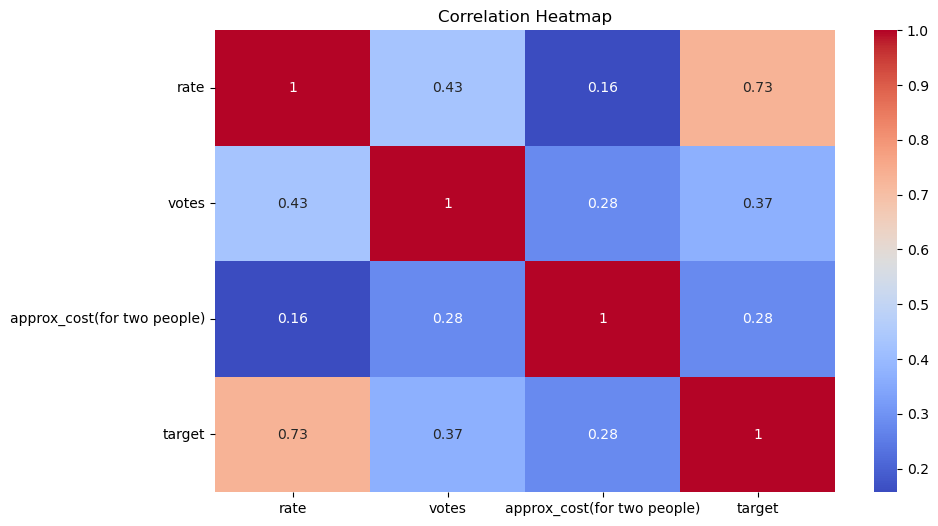

In [13]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

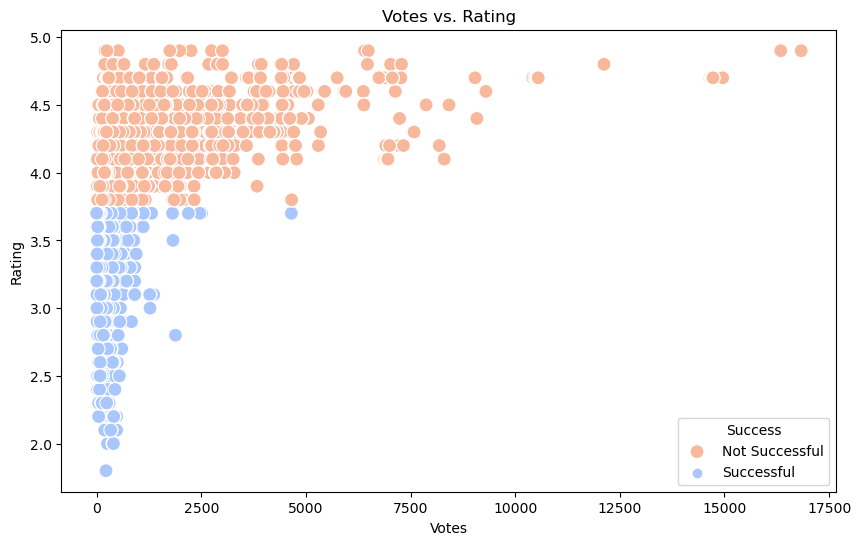

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='votes', y='rate', hue='target', palette='coolwarm', s=100)
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.legend(title='Success', labels=['Not Successful', 'Successful'])
plt.show()

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

In [16]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51717 non-null  object 
 1   book_table                   51717 non-null  object 
 2   rest_type                    51490 non-null  object 
 3   location                     51696 non-null  object 
 4   approx_cost(for two people)  44454 non-null  float64
 5   listed_in(type)              51717 non-null  object 
 6   listed_in(city)              51717 non-null  object 
 7   target                       51717 non-null  int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 3.0+ MB


,online_order,book_table,rest_type,location,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,Casual Dining,Banashankari,800.0,Buffet,Banashankari,1
1,Yes,No,Casual Dining,Banashankari,800.0,Buffet,Banashankari,1
2,Yes,No,"Cafe, Casual Dining",Banashankari,800.0,Buffet,Banashankari,1
3,No,No,Quick Bites,Banashankari,300.0,Buffet,Banashankari,0
4,No,No,Casual Dining,Basavanagudi,600.0,Buffet,Banashankari,1


In [17]:
x = data.drop("target",axis=1)
y = data["target"]

In [18]:
# Filling NaN values in 'location' column with corresponding values from 'listed_in(city)' column

x['location'] = x['location'].fillna(df['listed_in(city)'])
 
# Filling NaN values in 'rest_type' with the mode (most frequent value)
mode_rest_type = x['rest_type'].mode()[0]
x['rest_type'].fillna(mode_rest_type, inplace=True)

# Filling NaN values in 'approx_cost(for two people)' with the mean
mean_cost = x['approx_cost(for two people)'].mean()
x['approx_cost(for two people)'].fillna(mean_cost, inplace=True) 



In [19]:
numeric_features = ['approx_cost(for two people)']
categorical_features = ['online_order', 'book_table', 'location', 'listed_in(type)', 'listed_in(city)']

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [20]:
x.isna().sum()


online_order                   0
book_table                     0
rest_type                      0
location                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [21]:
y.isna().sum()

0

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [23]:
models = list()
models.append(("LR",LogisticRegression()))
models.append(("SVM",SVC()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("XG",XGBClassifier()))

 

In [24]:
for name ,model in models: 
    steps = list()
    steps.append(("Preprosser",preprocessor))
    steps.append(("classifier",model))
    pipeline = Pipeline(steps=steps)
    scores = cross_validate(pipeline, x, y,cv=5,scoring="accuracy",return_train_score=True)
    print(f'Model: {name}')
    print("Train_Accuracy", scores["train_score"].mean())
    print("Test_accuracy",scores["test_score"].mean())
    print("-"*25)
    

Model: CART
Train_Accuracy 0.8340729534851009
Test_accuracy 0.7386548314693111
-------------------------


In [25]:
steps = list()
steps.append(("preprocessor", preprocessor))
steps.append(("classifier",DecisionTreeClassifier()))
pipeline = Pipeline(steps=steps)


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [28]:
params = {
      'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__max_features': [None, 'auto', 'sqrt', 'log2']

}

In [29]:
grid = GridSearchCV(pipeline , param_grid=params, cv= 5 , scoring= "accuracy", return_train_score=True)


In [30]:
grid.fit(x,y)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Progr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['approx_cost(for '
                                                                          'two '
                                                                          'people)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['online_order',
                                                                          'book_table',
                                                                          'location',
                                                                          'listed_in(type)',
                                                                          'listed_in(city)'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20, 30, 40, 50],
                         'classifier__max_features': [None, 'auto', 'sqrt',
                                                      'log2'],
                         'classifier__min_samples_leaf': [1, 5, 10],
                         'classifier__min_samples_split': [2, 10, 20]},
             return_train_score=True, scoring='accuracy')

In [31]:
grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['approx_cost(for two '
                                                   'people)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['online_order', 'book_table',
                                                   'location',
                                                   'listed_in(type)',
                                                   'listed_in(city)'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=50, min_samples_leaf=5,
                                        min_samples_split=20))])

In [32]:
grid.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 50,
 'classifier__max_features': None,
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 20}

In [33]:
grid.best_score_

0.7435853735809903

In [34]:
print(x.isna().sum())
print(y.isna().sum())

online_order                   0
book_table                     0
rest_type                      0
location                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64
0


In [35]:
print(grid.cv_results_["mean_train_score"].mean() )
print(grid.cv_results_["mean_test_score"].mean())

0.7655452861079596
0.7161521038276201


In [36]:
print(grid.cv_results_["mean_train_score"].max() )
print(grid.cv_results_["mean_test_score"].max())

0.8340729534851009
0.7435853735809903


In [37]:
grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['approx_cost(for two '
                                                   'people)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['online_order', 'book_table',
                                                   'location',
                                                   'listed_in(type)',
                                                   'listed_in(city)'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=50, min_samples_leaf=5,
                                        min_samples_split=20))])

In [38]:
model = grid.best_estimator_

In [39]:
model.predict

<bound method Pipeline.predict of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['approx_cost(for two '
                                                   'people)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['online_order', 'book_table',
                                                   'location',
                                                   'listed_in(type)',
                                                   'listed_in(city)'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=50, min_samples_leaf=5,
                                        min_samples_split=20))])>

In [40]:
#deployment
joblib.dump(model , "Model_test.pk1")

['Model_test.pk1']

In [41]:
joblib.dump(x,"input.pk1")

['input.pk1']

In [42]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [43]:
df["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [44]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [45]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [47]:
!python --version

Python 3.10.9
